In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [56]:
forest_data=pd.read_csv("forestfires.csv")
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [22]:
forest_data.shape

(517, 31)

In [23]:
forest_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [24]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [25]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
sns.pairplot(forest_data)
plt.show()

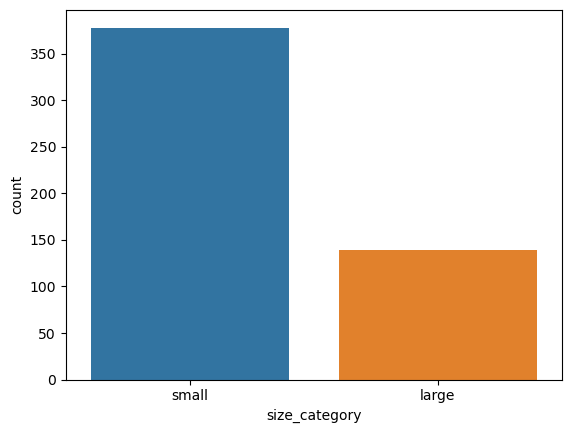

In [26]:
sns.countplot(forest_data['size_category'])
plt.show()

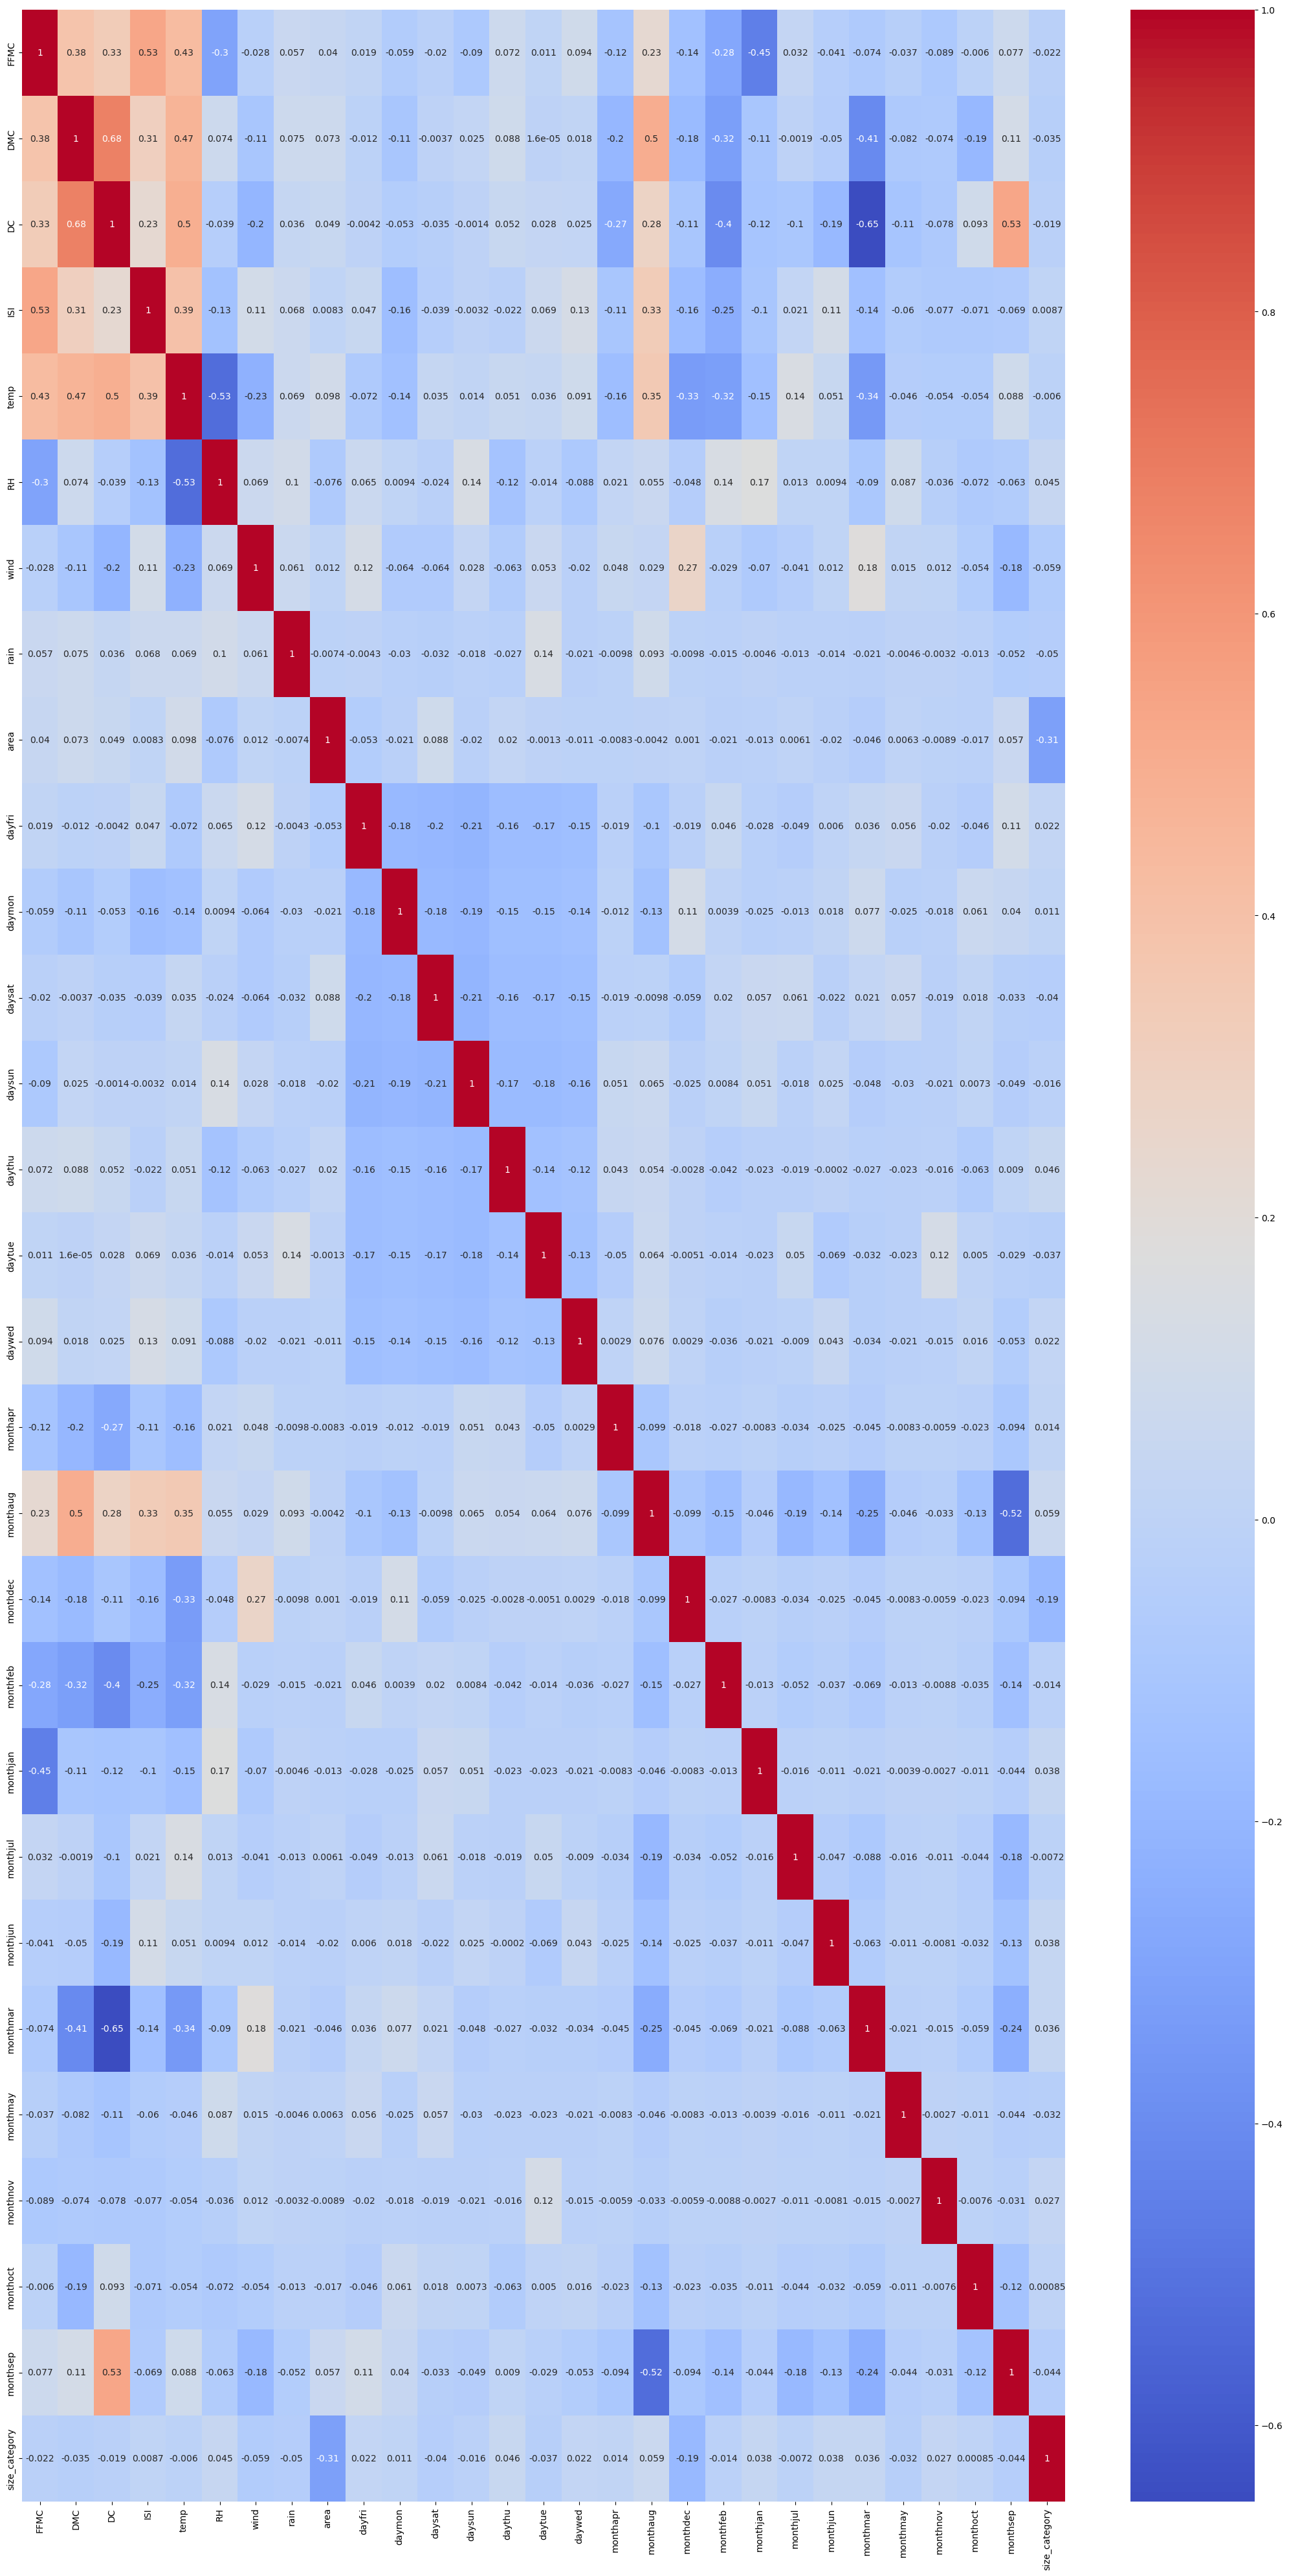

In [35]:
corr=forest_data.corr()
plt.figure(figsize=(26,50))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [27]:
le_encoder=LabelEncoder()
forest_data['size_category']=le_encoder.fit_transform(forest_data['size_category'])
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
forest_data=forest_data.drop("month",axis=1)
forest_data=forest_data.drop('day',axis=1)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
x=forest_data.drop('size_category',axis=1)
y=forest_data[["size_category"]]


In [50]:
# stantadizing data
s_scaler=StandardScaler()
x_scaled=s_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=25)

In [52]:
x_train.shape,y_train.shape

((413, 28), (413, 1))

In [49]:
x_test.shape,y_test.shape

((104, 28), (104, 1))

In [60]:
linear_model=SVC(kernel='linear')
linear_model.fit(x_train,y_train)

SVC(kernel='linear')

In [61]:
y_pred=linear_model.predict(x_test)

In [65]:
print('Accuracy score:' ,accuracy_score(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))
print('confusion metrics:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.9038461538461539
classification report:               precision    recall  f1-score   support

           0       1.00      0.68      0.81        31
           1       0.88      1.00      0.94        73

    accuracy                           0.90       104
   macro avg       0.94      0.84      0.87       104
weighted avg       0.92      0.90      0.90       104

confusion metrics:
 [[21 10]
 [ 0 73]]


In [68]:
#using rbf
rbf_model=SVC(kernel='rbf',random_state=40,gamma=0.1,C=1.0)
rbf_model.fit(x_train,y_train)


SVC(gamma=0.1, random_state=40)

In [69]:
y_pred2=rbf_model.predict(x_test)

In [70]:
print('Accuracy score:' ,accuracy_score(y_test,y_pred2))
print('classification report:',classification_report(y_test,y_pred2))
print('confusion metrics:\n',confusion_matrix(y_test,y_pred2))

Accuracy score: 0.7403846153846154
classification report:               precision    recall  f1-score   support

           0       0.64      0.29      0.40        31
           1       0.76      0.93      0.83        73

    accuracy                           0.74       104
   macro avg       0.70      0.61      0.62       104
weighted avg       0.72      0.74      0.70       104

confusion metrics:
 [[ 9 22]
 [ 5 68]]


In [71]:
poly_model=SVC(kernel='poly',random_state=40,gamma=0.1,C=1.0)
poly_model.fit(x_train,y_train)


SVC(gamma=0.1, kernel='poly', random_state=40)

In [72]:
y_pred3=poly_model.predict(x_test)

In [73]:
print('Accuracy score:' ,accuracy_score(y_test,y_pred3))
print('classification report:',classification_report(y_test,y_pred3))
print('confusion metrics:\n',confusion_matrix(y_test,y_pred3))

Accuracy score: 0.7596153846153846
classification report:               precision    recall  f1-score   support

           0       0.65      0.42      0.51        31
           1       0.79      0.90      0.84        73

    accuracy                           0.76       104
   macro avg       0.72      0.66      0.68       104
weighted avg       0.75      0.76      0.74       104

confusion metrics:
 [[13 18]
 [ 7 66]]


### SVM with GrisSearchCV

In [87]:
svc_model=SVC()
param_grid={'kernel':['linear','poly','rbf','sigoid'],'gamma':['0.1',1,'scale','auto']}
grid=GridSearchCV(svc_model,param_grid,cv=5)
grid.fit(x_train,y_train)
print('Best params:',grid.best_params_,'\n''Best score:',grid.best_score_)
print('Best estimator:',grid.best_estimator_)

Best params: {'gamma': 1, 'kernel': 'linear'} 
Best score: 0.8886864531295915
Best estimator: SVC(gamma=1, kernel='linear')
